### Importing required Packages

In [10]:
import pytesseract
from PIL import Image
import numpy as np
import keras
import os
from keras.models import model_from_json

## Modelling

Using 3 Models in Extracting the Features of Receipt Pattern, Important Text words and combined Classification Model for receipt Classification

### ! )  Pattern Recognition Model 
Residual Neural Network of 10 layers to recongnise and differentiate the Receipts of 3 types and the other images. 
The Last before layer Output Prediction values are considered as Pattern Features of each Image.

    Input:  Receipt Images and Other Paper(included text) images 
    Output:  Last before layer Prediction of 124 length Embedding of specifying the Pattern of Receipt
    

### !! ) Text Classification Model
Extracting the Text of each Receipt with the use of Optical Character Recognition (tesseeract) and differentiating the Receipt text with some novels or different text to extract the key features of Receipt text information.
    
    Input:  Extracted Text of Receipts and Extracted Text of some different Non-Receipt images
    Output:  Last before layer Prediction of 124 length Embedding of specifying the Important Words information

### !!! ) Convolution Network to Classify the Image
Neural Network of 4 layers with the concatenated input of Pattern Information Embedding and the Important Key words Text information as Inputs
    
    Input:  Concatenated Features infomation of Model 1 Pattern output and Model 2 Text information output
    Output:  Classified Output of Receipt or Not


In [14]:
def Load_Models():
    # 1) Pattern Recognition Model
    # load json and create model
    json_file = open('Models\Pattern_recognition\Pattern_recognizer.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    Pattern_Model = model_from_json(loaded_model_json)
    # load weights into new model
    Pattern_Model.load_weights("Models\Pattern_recognition\Pattern_recognizer.h5")
    print("Loaded model from disk")
    
    # 2) Text Classification Model
    # load json and create model
    json_file = open('Models\Text_Extraction\Text_Model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    Text_model = model_from_json(loaded_model_json)
    # load weights into new model
    Text_model.load_weights("Models\Text_Extraction\Text_Model.h5")
    print("Loaded model from disk")

    # 3) Receipt Classification Model
    # load json and create model
    json_file = open('Models\Classification\Classification_Model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    Classifier = model_from_json(loaded_model_json)
    # load weights into new model
    Classifier.load_weights("Models\Classification\Classification_Model.h5")
    print("Loaded model from disk")
    return Pattern_Model, Text_model, Classifier

### Function to read the Image 

    Image -> Pattern_recognition MOdel -> Pattern_Embedding
    Image -> Text Extraction Model     -> Text_Embedding
                                          
                                       -> Receipt_Classifier -> Classification Output

In [28]:
def test_image(img_path,Pattern_Model, Text_model, Classifier):
    image = Image.open(img_path)
    Img = np.array(image.resize((60,60),Image.ANTIALIAS))
    Img_pattern = Pattern_Model.predict(Img[None,:])
    text = pytesseract.image_to_string(image)
    text = keras.preprocessing.sequence.pad_sequences([list(map(ord,text))],maxlen=2000)
    text_info = Text_model.predict(text[None,:])

    Category_predicted = np.argmax(np.round(Classifier.predict(np.concatenate((Img_pattern,text_info),axis=1)[:,None])))
    return Category_predicted

### Loading Required Models

In [23]:
# Loading Required Models
Pattern_Model, Text_model, Classifier = Load_Models()


Loaded model from disk
Loaded model from disk
Loaded model from disk


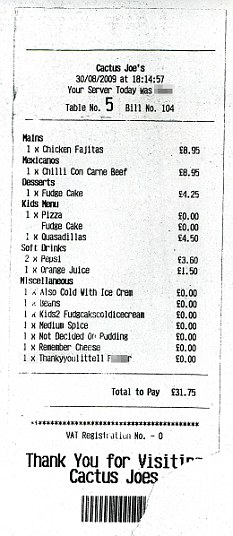

In [29]:
img_path = r'Pictures\Receipt_Type1\OTH63article-1212583-06601FEE000005DC-940-233x536.jpg'
Category_predicted = test_image(img_path,Pattern_Model, Text_model, Classifier)
Image.open(img_path)

In [30]:
print('Classified Output is -------- ' ,os.listdir(r'Pictures')[Category_predicted].split('_')[0])

Classified Output is --------  Receipt
